In [402]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [403]:
# Read the train data
train_df = pd.read_csv('Loan_train.csv',header=0)
test_df = pd.read_csv('Loan_test.csv',header=0)
combine = [train_df, test_df]
train_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [404]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [405]:
len(train_df[train_df['LoanAmount'].isnull()])

22

In [406]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [407]:
train_df.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001027,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [408]:
len(train_df[train_df['Property_Area'] == 'Urban'])

202

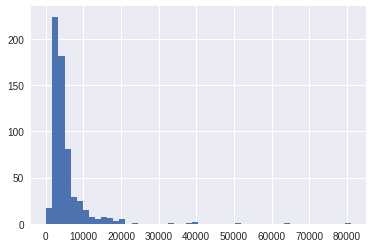

In [409]:

train_df['ApplicantIncome'].hist(bins = 50)

In [410]:
train_df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [411]:
len(train_df[train_df['ApplicantIncome'] > 20000])

12

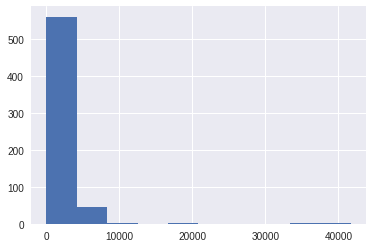

In [412]:

train_df['CoapplicantIncome'].hist(bins = 10)


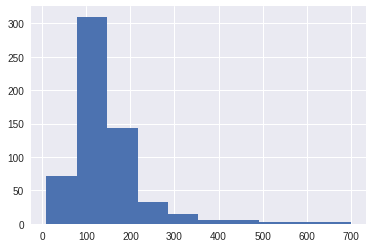

In [413]:
train_df['LoanAmount'].hist(bins = 10)


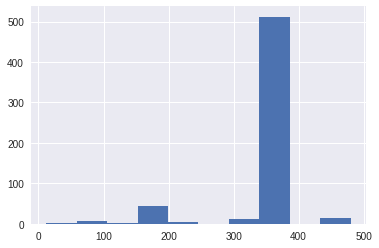

In [414]:
train_df['Loan_Amount_Term'].hist(bins = 10)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a37b78f98>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f4a379d6860>], dtype=object)

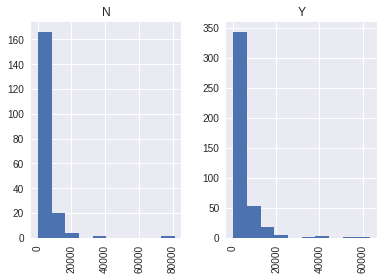

In [415]:

pd.DataFrame.hist(train_df , column = 'ApplicantIncome', by='Loan_Status')

In [416]:
Loan_xt = pd.crosstab(train_df['Credit_History'],train_df['Loan_Status'])
Loan_xt

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


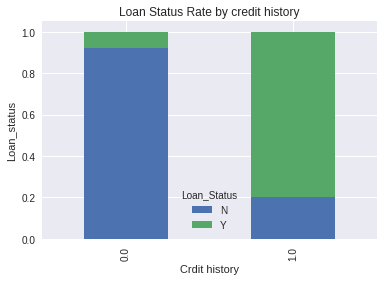

In [417]:
loan_xt_plt = Loan_xt.div(Loan_xt.sum(1).astype(float), axis=0)
loan_xt_plt.plot(kind='bar', stacked=True, title='Loan Status Rate by credit history')
plt.xlabel("Crdit history")
plt.ylabel("Loan_status")

In [418]:
gender_xt = pd.crosstab(train_df['Gender'], train_df['Loan_Status'])
gender_xt

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


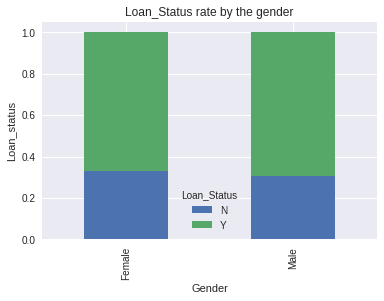

In [419]:
gender_xt_plt = gender_xt.div(gender_xt.sum(1).astype(float), axis=0)
gender_xt_plt.plot(kind='bar', stacked=True, title='Loan_Status rate by the gender')
plt.xlabel('Gender')
plt.ylabel('Loan_status')

In [420]:
Education_xt = pd.crosstab(train_df['Education'],train_df['Loan_Status'])
Education_xt

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


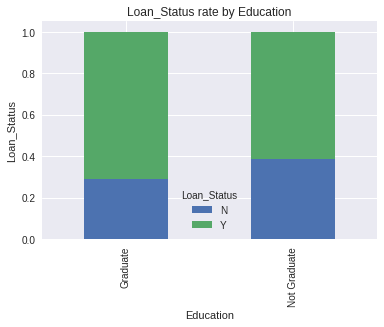

In [421]:
Education_xt_plt = Education_xt.div(Education_xt.sum(1).astype(float), axis=0)
Education_xt_plt.plot(kind='bar', stacked=True, title="Loan_Status rate by Education")
plt.xlabel("Education")
plt.ylabel("Loan_Status")

In [422]:
dependent_xt = pd.crosstab(train_df['Dependents'],train_df['Loan_Status'])
dependent_xt

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


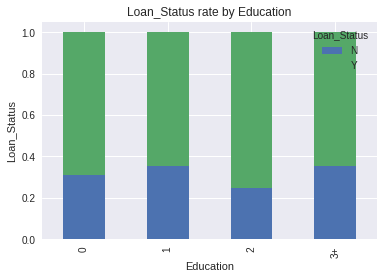

In [423]:
dependent_xt_plt = dependent_xt.div(dependent_xt.sum(1).astype(float), axis=0)
dependent_xt_plt.plot(kind='bar', stacked=True, title="Loan_Status rate by Education")
plt.xlabel("Education")
plt.ylabel("Loan_Status")

In [424]:
married_xt = pd.crosstab(train_df['Married'],train_df['Loan_Status'])
married_xt

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


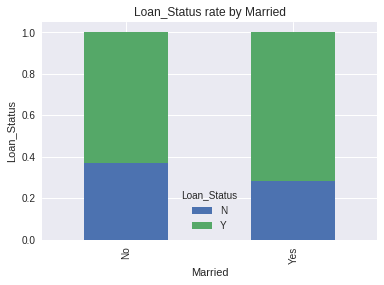

In [425]:
married_xt_plt = married_xt.div(married_xt.sum(1).astype(float), axis=0)
married_xt_plt.plot(kind='bar', stacked=True, title="Loan_Status rate by Married")
plt.xlabel("Married")
plt.ylabel("Loan_Status")

In [426]:
self_employed_xt = pd.crosstab(train_df['Self_Employed'],train_df['Loan_Status'])
self_employed_xt

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


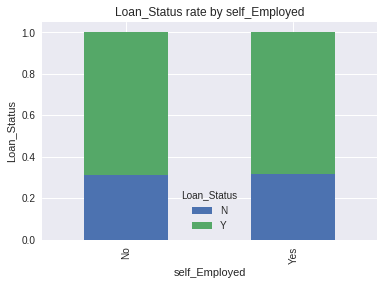

In [427]:
self_employed_xt_plt = self_employed_xt.div(self_employed_xt.sum(1).astype(float), axis=0)
self_employed_xt_plt.plot(kind='bar', stacked=True, title="Loan_Status rate by self_Employed")
plt.xlabel("self_Employed")
plt.ylabel("Loan_Status")

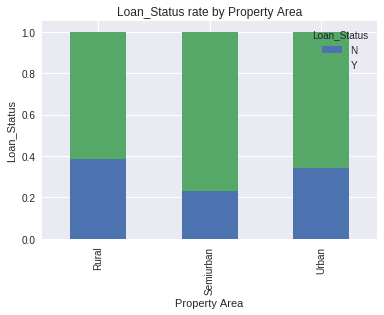

In [428]:
Property_Area_xt = pd.crosstab(train_df['Property_Area'],train_df['Loan_Status'])
Property_Area_xt_plt = Property_Area_xt.div(Property_Area_xt.sum(1).astype(float), axis=0)
Property_Area_xt_plt.plot(kind='bar', stacked=True, title="Loan_Status rate by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Loan_Status")

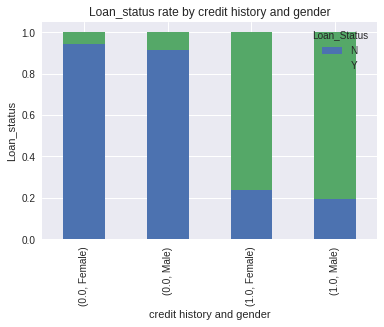

In [429]:
credit_gender_xt = pd.crosstab([train_df.Credit_History,train_df.Gender],train_df['Loan_Status'])
credit_gender_xt_plt = credit_gender_xt.div(credit_gender_xt.sum(1).astype(float), axis=0)
credit_gender_xt_plt.plot(kind='bar', stacked=True, title="Loan_status rate by credit history and gender")
plt.xlabel('credit history and gender')
plt.ylabel('Loan_status')

In [430]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [431]:
gender_xt = train_df['Gender'].unique()
gender_xt_plt = dict(zip(gender_xt, range(0,len(gender_xt)+1)))
gender_xt_plt

{'Male': 0, 'Female': 1, nan: 2}

In [432]:
train_df['Gender_value'] = train_df['Gender'].map(gender_xt_plt).astype(int)
if len(train_df[train_df['Gender_value'] == 2] > 0):
    train_df.replace({'Gender_value' : 
                   { 2 : gender_xt_plt['Male']
                   }
               }, 
               inplace=True)

In [433]:
sorted(train_df['Gender_value'].unique())

[0, 1]

In [434]:
gender_df = pd.get_dummies(train_df['Gender_value'])
gender_df = gender_df.rename(columns = {0 : "Male", 1:"Female"})
gender_df

,Male,Female
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [435]:
train_df = pd.concat([train_df, gender_df], axis=1)
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_value,Male,Female
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0,1,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1,0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,0,1,0
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,0,1,0
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,0,1,0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,0,1,0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,0,1,0


In [436]:
del train_df['Gender']

In [437]:
train_df.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_value,Male,Female
0,LP001002,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0,1,0
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1,0
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1,0
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1,0


In [438]:
del train_df['Gender_value']

In [439]:
train_df.columns

Index(['Loan_ID', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Male', 'Female'],
      dtype='object')

In [440]:
married_xt = train_df['Married'].unique()
married_xt_plt = dict(zip(married_xt, range(0,len(gender_xt)+1)))
married_xt_plt

{'No': 0, 'Yes': 1, nan: 2}

In [441]:
train_df['married_value'] = train_df['Married'].map(married_xt_plt).astype(int)
if len(train_df[train_df['married_value'] == 2] > 0):
    train_df.replace({'married_value' : 
                   { 2 : married_xt_plt['Yes']
                   }
               }, 
               inplace=True)

In [442]:
sorted(train_df['married_value'].unique())

[0, 1]

In [443]:
married_df = pd.get_dummies(train_df['married_value'])
married_df = married_df.rename(columns = {0:'No_married',1:'Yes_married'})
married_df


,No_married,Yes_married
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [444]:
train_df = pd.concat([train_df,married_df], axis=1)
train_df

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Female,married_value,No_married,Yes_married
0,LP001002,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0,1,0
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,0,1,0,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,0,1,0,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,0,1,0,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,1,0
5,LP001011,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,0,1,0,1
6,LP001013,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,1,0,1,0,1
7,LP001014,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,1,0,1,0,1
8,LP001018,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,1,0,1,0,1
9,LP001020,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,1,0,1,0,1


In [445]:
del train_df['married_value']

In [446]:
del train_df['Married']

In [447]:
train_df.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Female,No_married,Yes_married
0,LP001002,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,1,0
1,LP001003,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,0,0,1
2,LP001005,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,0,0,1
3,LP001006,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,0,0,1
4,LP001008,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,1,0


In [448]:
Education_df = pd.get_dummies(train_df['Education'])
train_df = pd.concat([train_df,Education_df], axis=1)
train_df.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Female,No_married,Yes_married,Graduate,Not Graduate
0,LP001002,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,1,0,1,0
1,LP001003,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,0,0,1,1,0
2,LP001005,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,0,0,1,1,0
3,LP001006,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,0,0,1,0,1
4,LP001008,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,1,0,1,0


In [449]:
del train_df['Education']

In [450]:
area_dummies = pd.get_dummies(train_df['Property_Area'])
area_dummies

,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,1,0
8,0,0,1
9,0,1,0


In [451]:
train_df = pd.concat([train_df, area_dummies], axis=1)
train_df

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Female,No_married,Yes_married,Graduate,Not Graduate,Rural,Semiurban,Urban
0,LP001002,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,1,0,1,0,0,0,1
1,LP001003,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,0,0,1,1,0,1,0,0
2,LP001005,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,0,0,1,1,0,0,0,1
3,LP001006,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,0,0,1,0,1,0,0,1
4,LP001008,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,1,0,1,0,0,0,1
5,LP001011,2,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,0,0,1,1,0,0,0,1
6,LP001013,0,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,1,0,0,1,0,1,0,0,1
7,LP001014,3+,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,1,0,0,1,1,0,0,1,0
8,LP001018,2,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,1,0,0,1,1,0,0,0,1
9,LP001020,1,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,1,0,0,1,1,0,0,1,0


In [452]:
Loan_status_unique = sorted(train_df['Loan_Status'].unique())
Loan_status_unique_xt = dict(zip(Loan_status_unique, range(0,len(Loan_status_unique)+1)))
Loan_status_unique_xt

{'N': 0, 'Y': 1}

In [453]:

train_df['Loan_status_value'] = train_df['Loan_Status'].map(Loan_status_unique_xt).astype(int)

In [454]:
train_df.head()

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Female,No_married,Yes_married,Graduate,Not Graduate,Rural,Semiurban,Urban,Loan_status_value
0,LP001002,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,1,0,1,0,0,0,1,1
1,LP001003,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,0,0,1,1,0,1,0,0,0
2,LP001005,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,0,0,1,1,0,0,0,1,1
3,LP001006,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,0,0,1,0,1,0,0,1,1
4,LP001008,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,1,0,1,0,0,0,1,1


In [455]:




unique_self  = train_df['Self_Employed'].unique()
unique_self_xt = dict(zip(unique_self, range(0,len(unique_self)+1)))

In [456]:
train_df['Self_Employed_value'] = train_df['Self_Employed'].map(unique_self_xt).astype(int)
train_df.head()

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,...,Female,No_married,Yes_married,Graduate,Not Graduate,Rural,Semiurban,Urban,Loan_status_value,Self_Employed_value
0,LP001002,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y,...,0,1,0,1,0,0,0,1,1,0
1,LP001003,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,...,0,0,1,1,0,1,0,0,0,0
2,LP001005,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,...,0,0,1,1,0,0,0,1,1,1
3,LP001006,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,...,0,0,1,0,1,0,0,1,1,0
4,LP001008,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y,...,0,1,0,1,0,0,0,1,1,0


In [457]:
if len(train_df[train_df['Self_Employed_value'] == 2] > 0):
    train_df.replace({'Self_Employed_value' : 
                   { 2 : unique_self_xt['No']
                   }
               }, 
               inplace=True)

In [458]:
del train_df['Self_Employed']

In [459]:
del train_df['Loan_Status']

In [460]:
del train_df['Property_Area']

In [461]:
train_df.columns

Index(['Loan_ID', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Male', 'Female',
       'No_married', 'Yes_married', 'Graduate', 'Not Graduate', 'Rural',
       'Semiurban', 'Urban', 'Loan_status_value', 'Self_Employed_value'],
      dtype='object')

In [462]:
train_df['Credit_History'].fillna(0.0, inplace=True)

In [463]:
unique_credit = sorted(train_df['Credit_History'].unique())
unique_credit

[0.0, 1.0]

In [464]:

unique_credit_xt = dict(zip(unique_credit, range(0,len(unique_credit)+1)))
unique_credit_xt = train_df['Credit_History_value'] = train_df['Credit_History'].map(unique_credit_xt).astype(int)


In [465]:
len(train_df[train_df['Credit_History_value'] == 1])

475

In [466]:
del train_df['Credit_History']

In [467]:
train_df.columns

Index(['Loan_ID', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Male', 'Female', 'No_married',
       'Yes_married', 'Graduate', 'Not Graduate', 'Rural', 'Semiurban',
       'Urban', 'Loan_status_value', 'Self_Employed_value',
       'Credit_History_value'],
      dtype='object')

In [468]:
data = train_df[['ApplicantIncome','CoapplicantIncome']]
corr = data.corr(method = 'pearson')
corr

,ApplicantIncome,CoapplicantIncome
ApplicantIncome,1.000000,-0.116605
CoapplicantIncome,-0.116605,1.000000


In [469]:
data = train_df[['ApplicantIncome','Loan_status_value']]
corr = data.corr(method = 'pearson')
corr

,ApplicantIncome,Loan_status_value
ApplicantIncome,1.00000,-0.00471
Loan_status_value,-0.00471,1.00000


In [470]:
data = train_df[['CoapplicantIncome','Loan_status_value']]
corr = data.corr(method = 'pearson')
corr

,CoapplicantIncome,Loan_status_value
CoapplicantIncome,1.000000,-0.059187
Loan_status_value,-0.059187,1.000000


In [471]:
train_df['total_income']= train_df['ApplicantIncome'] + train_df['CoapplicantIncome'] 

In [472]:
data = train_df[['total_income','Loan_status_value']]
corr = data.corr(method = 'pearson')
corr

,total_income,Loan_status_value
total_income,1.000000,-0.031271
Loan_status_value,-0.031271,1.000000


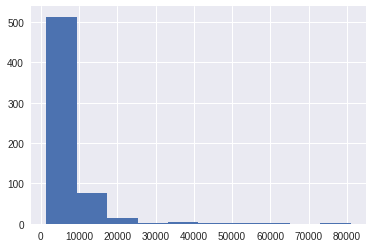

In [473]:
train_df['total_income'].hist( bins =10)

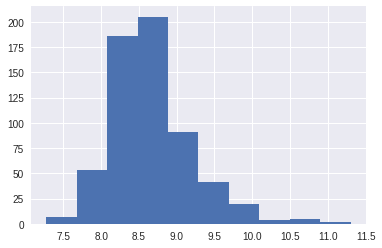

In [474]:
train_df['total_income1'] = np.log(train_df['total_income'])
train_df['total_income1'].hist( bins =10)

In [475]:
print(np.median(train_df['total_income1']))

8.59720512513


In [476]:
print(np.mean(train_df['total_income1']))

8.669413562902252


In [477]:
del train_df['ApplicantIncome']

In [478]:
del train_df['total_income']


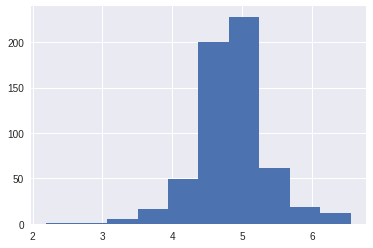

In [479]:
train_df['LoanAmountTrans'] = np.log(train_df['LoanAmount'])
train_df['LoanAmountTrans'].hist(bins =10)

In [480]:
np.mean(train_df['LoanAmountTrans'])

4.857444178729353

In [481]:
# it is almost symmetric distribution so we can replace the null value with mean
train_df['LoanAmountTrans'].fillna(train_df['LoanAmountTrans'].mean(), inplace=True)

In [482]:
del train_df['LoanAmount']

In [483]:
del train_df['CoapplicantIncome']
train_df.columns

Index(['Loan_ID', 'Dependents', 'Loan_Amount_Term', 'Male', 'Female',
       'No_married', 'Yes_married', 'Graduate', 'Not Graduate', 'Rural',
       'Semiurban', 'Urban', 'Loan_status_value', 'Self_Employed_value',
       'Credit_History_value', 'total_income1', 'LoanAmountTrans'],
      dtype='object')

In [484]:
train_df['Loan_Amount_Term'].fillna(np.mean(train_df['Loan_Amount_Term']), inplace = True)

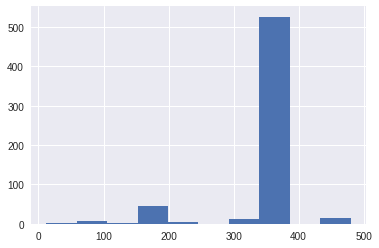

In [485]:
train_df['Loan_Amount_Term'].hist(bins =10)

In [486]:
train_df['Loan_Amount_Term_Trans'] = np.exp(train_df['Loan_Amount_Term'])

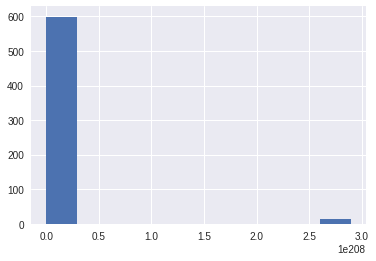

In [487]:
train_df['Loan_Amount_Term_Trans'].hist(bins = 10)

In [488]:
dependents_married_crosstb = pd.crosstab([train_df['Yes_married'],train_df['Graduate'],train_df['Male'],train_df['Self_Employed_value']], train_df['Dependents'])
dependents_married_crosstb

Dependents                                       0   1   2  3+
Yes_married Graduate Male Self_Employed_value                 
0           0        0    0                      8   2   0   1
                          1                      2   1   0   0
                     1    0                     24   2   0   1
                          1                      2   2   0   0
            1        0    0                     44   8   2   2
                          1                      6   2   0   0
                     1    0                     74   5   6   2
                          1                     11   1   0   1
1           0        0    0                      4   0   1   0
                          1                      1   0   0   0
                     1    0                     26  14  21  10
                          1                      3   0   2   3
            1        0    0                     14   4   4   0
                          1                      1   2   0   0
                     1    0                    114  47  51  28
                          1                     11  12  14   3

In [489]:
missing_dependent_predict_df = train_df[train_df['Dependents'].isnull()]
missing_dependent_predict_df

,Loan_ID,Dependents,Loan_Amount_Term,Male,Female,No_married,Yes_married,Graduate,Not Graduate,Rural,Semiurban,Urban,Loan_status_value,Self_Employed_value,Credit_History_value,total_income1,LoanAmountTrans,Loan_Amount_Term_Trans
102,LP001350,NaN,360.0,1,0,0,1,1,0,0,0,1,1,0,1,9.521495,4.857444,2.218265e+156
104,LP001357,NaN,360.0,1,0,0,1,1,0,0,0,1,1,0,1,8.427268,5.075174,2.218265e+156
120,LP001426,NaN,360.0,1,0,0,1,1,0,1,0,0,1,0,1,9.028099,5.192957,2.218265e+156
226,LP001754,NaN,360.0,1,0,0,1,0,1,0,0,1,0,1,1,8.462737,4.927254,2.218265e+156
228,LP001760,NaN,480.0,1,0,0,1,1,0,0,1,0,1,0,1,8.467583,5.062595,2.893019e+208
293,LP001945,NaN,480.0,0,1,1,0,1,0,0,0,1,0,0,0,8.597297,4.962845,2.893019e+208
301,LP001972,NaN,360.0,1,0,0,1,0,1,0,1,0,1,0,1,8.439232,4.653960,2.218265e+156
332,LP002100,NaN,360.0,1,0,1,0,1,0,0,0,1,1,0,1,7.949091,4.262680,2.218265e+156
335,LP002106,NaN,342.0,1,0,0,1,1,0,0,1,0,1,1,1,9.209640,4.248495,3.378414e+148
346,LP002130,NaN,360.0,1,0,0,1,0,1,1,0,0,0,0,0,8.817742,5.023881,2.218265e+156


In [490]:
missing_dependent_train_df = train_df[train_df['Dependents'].isnull() == False]
missing_dependent_train_df.head()

,Loan_ID,Dependents,Loan_Amount_Term,Male,Female,No_married,Yes_married,Graduate,Not Graduate,Rural,Semiurban,Urban,Loan_status_value,Self_Employed_value,Credit_History_value,total_income1,LoanAmountTrans,Loan_Amount_Term_Trans
0,LP001002,0,360.0,1,0,1,0,1,0,0,0,1,1,0,1,8.674026,4.857444,2.218265e+156
1,LP001003,1,360.0,1,0,0,1,1,0,1,0,0,0,0,1,8.714568,4.852030,2.218265e+156
2,LP001005,0,360.0,1,0,0,1,1,0,0,0,1,1,1,1,8.006368,4.189655,2.218265e+156
3,LP001006,0,360.0,1,0,0,1,0,1,0,0,1,1,0,1,8.505323,4.787492,2.218265e+156
4,LP001008,0,360.0,1,0,1,0,1,0,0,0,1,1,0,1,8.699515,4.948760,2.218265e+156


In [491]:
del missing_dependent_train_df['Loan_ID']

In [492]:
del missing_dependent_predict_df['Loan_ID']

In [493]:
missing_dependent_predict_df.head()

,Dependents,Loan_Amount_Term,Male,Female,No_married,Yes_married,Graduate,Not Graduate,Rural,Semiurban,Urban,Loan_status_value,Self_Employed_value,Credit_History_value,total_income1,LoanAmountTrans,Loan_Amount_Term_Trans
102,NaN,360.0,1,0,0,1,1,0,0,0,1,1,0,1,9.521495,4.857444,2.218265e+156
104,NaN,360.0,1,0,0,1,1,0,0,0,1,1,0,1,8.427268,5.075174,2.218265e+156
120,NaN,360.0,1,0,0,1,1,0,1,0,0,1,0,1,9.028099,5.192957,2.218265e+156
226,NaN,360.0,1,0,0,1,0,1,0,0,1,0,1,1,8.462737,4.927254,2.218265e+156
228,NaN,480.0,1,0,0,1,1,0,0,1,0,1,0,1,8.467583,5.062595,2.893019e+208


In [494]:
missing_dependent_train_value = missing_dependent_train_df.values
miss_train_y = missing_dependent_train_value[:,0]
miss_train_x = missing_dependent_train_value[:,1:]
missing_dependent_test_value = missing_dependent_predict_df.values
miss_test_x = missing_dependent_test_value[:,1:]

In [495]:
miss_train_x

array([[360.0, 1, 0, ..., 8.674025985443025, 4.857444178729353,
        2.2182652975385555e+156],
       [360.0, 1, 0, ..., 8.714567550836485, 4.852030263919617,
        2.2182652975385555e+156],
       [360.0, 1, 0, ..., 8.006367567650246, 4.189654742026425,
        2.2182652975385555e+156],
       ..., 
       [360.0, 1, 0, ..., 9.025455532779063, 5.53338948872752,
        2.2182652975385555e+156],
       [360.0, 1, 0, ..., 8.933664178700935, 5.231108616854587,
        2.2182652975385555e+156],
       [360.0, 0, 1, ..., 8.430109084509125, 4.890349128221754,
        2.2182652975385555e+156]], dtype=object)

In [496]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.cross_validation import train_test_split ,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



In [497]:
logistic = LogisticRegression(solver = 'sag', multi_class = 'multinomial', warm_start= True, n_jobs=-1)
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(miss_train_x)
x_test = scale.fit_transform(miss_test_x)

/home/lalit/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/lalit/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [498]:
logistic_fit = logistic.fit(X,miss_train_y)

In [499]:
prediction = logistic.predict(x_test)


In [500]:
logistic.score(X,miss_train_y)

0.58597662771285475

In [501]:
scores = cross_val_score(logistic, X, miss_train_y, cv=5)
scores    

array([ 0.56557377,  0.55833333,  0.57983193,  0.57142857,  0.56302521])

In [502]:
prediction = logistic.predict(x_test)
prediction

array(['0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0'], dtype=object)

In [503]:
 from sklearn.neighbors import KNeighborsClassifier

In [504]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, miss_train_y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [505]:
output = neigh.predict(x_test)
for i,p in enumerate(output):
    print("prediction is : {} for the given data {}".format(p,missing_dependent_predict_df.iloc[i]))

prediction is : 0 for the given data Dependents                         NaN
Loan_Amount_Term                   360
Male                                 1
Female                               0
No_married                           0
Yes_married                          1
Graduate                             1
Not Graduate                         0
Rural                                0
Semiurban                            0
Urban                                1
Loan_status_value                    1
Self_Employed_value                  0
Credit_History_value                 1
total_income1                  9.52149
LoanAmountTrans                4.85744
Loan_Amount_Term_Trans    2.21827e+156
Name: 102, dtype: object
prediction is : 2 for the given data Dependents                         NaN
Loan_Amount_Term                   360
Male                                 1
Female                               0
No_married                           0
Yes_married                          1
Grad

In [506]:
missing_dependent_predict_df.columns


Index(['Dependents', 'Loan_Amount_Term', 'Male', 'Female', 'No_married',
       'Yes_married', 'Graduate', 'Not Graduate', 'Rural', 'Semiurban',
       'Urban', 'Loan_status_value', 'Self_Employed_value',
       'Credit_History_value', 'total_income1', 'LoanAmountTrans',
       'Loan_Amount_Term_Trans'],
      dtype='object')

In [507]:
print(output[:])

['0' '2' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '3+' '0' '0']


In [508]:
iterator =0
for index in missing_dependent_predict_df.index:
    train_df.set_value(index, 'Dependents', output[iterator])
    iterator = iterator+1

In [509]:
len(train_df[train_df['Dependents'].isnull()])

0

In [510]:
del train_df['Loan_ID']

In [511]:
dependent_dummies = pd.get_dummies(train_df['Dependents'])
dependent_dummies

,0,1,2,3+
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,0,0,1,0
6,1,0,0,0
7,0,0,0,1
8,0,0,1,0
9,0,1,0,0


In [512]:
train_df = pd.concat([train_df, dependent_dummies], axis=1)
train_df.head()

,Dependents,Loan_Amount_Term,Male,Female,No_married,Yes_married,Graduate,Not Graduate,Rural,Semiurban,...,Loan_status_value,Self_Employed_value,Credit_History_value,total_income1,LoanAmountTrans,Loan_Amount_Term_Trans,0,1,2,3+
0,0,360.0,1,0,1,0,1,0,0,0,...,1,0,1,8.674026,4.857444,2.218265e+156,1,0,0,0
1,1,360.0,1,0,0,1,1,0,1,0,...,0,0,1,8.714568,4.852030,2.218265e+156,0,1,0,0
2,0,360.0,1,0,0,1,1,0,0,0,...,1,1,1,8.006368,4.189655,2.218265e+156,1,0,0,0
3,0,360.0,1,0,0,1,0,1,0,0,...,1,0,1,8.505323,4.787492,2.218265e+156,1,0,0,0
4,0,360.0,1,0,1,0,1,0,0,0,...,1,0,1,8.699515,4.948760,2.218265e+156,1,0,0,0


In [513]:
del train_df['Dependents']

In [514]:
train_df = train_df[['Loan_Amount_Term', 'Male', 'Female', 'No_married', 'Yes_married',
       'Graduate', 'Not Graduate', 'Rural', 'Semiurban', 'Urban',
        'Self_Employed_value', 'Credit_History_value',
       'total_income1', 'LoanAmountTrans', 'Loan_Amount_Term_Trans', '0', '1',
       '2', '3+','Loan_status_value',]]
train_df.columns

Index(['Loan_Amount_Term', 'Male', 'Female', 'No_married', 'Yes_married',
       'Graduate', 'Not Graduate', 'Rural', 'Semiurban', 'Urban',
       'Self_Employed_value', 'Credit_History_value', 'total_income1',
       'LoanAmountTrans', 'Loan_Amount_Term_Trans', '0', '1', '2', '3+',
       'Loan_status_value'],
      dtype='object')

In [524]:
train_values = train_df.values
y_train = train_values[:,-1]
x_train = train_values[:,:-1]
scale1 = StandardScaler()
train_x = scale1.fit_transform(x_train)

/home/lalit/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [525]:
model = LogisticRegression()
train_x1, test_x1, train_y1, test_y1 = train_test_split(train_x,y_train)

In [526]:
model_fit = model.fit(train_x1,train_y1)

In [528]:
score = model_fit.score(train_x1, train_y1)
print("Mean accuracy of Logistic Regression is : {0}".format(score))

Mean accuracy of Logistic Regression is : 0.7739130434782608


In [530]:
predict_y = model_fit.predict(test_x1)


In [532]:
print(classification_report(test_y1, predict_y, target_names=['loan_not_pass', 'Loan_pass']))

               precision    recall  f1-score   support

loan_not_pass       0.62      0.42      0.50        43
    Loan_pass       0.80      0.90      0.85       111

  avg / total       0.75      0.77      0.75       154



In [533]:
precisions = cross_val_score(model, train_x1, train_y1, cv=5, scoring='precision')
print('Precision', np.mean(precisions), precisions)

recalls = cross_val_score(model, train_x1, train_y1, cv=5,scoring='recall')
print('Recalls', np.mean(recalls), recalls)

Precision 0.788600246209 [ 0.78571429  0.7972973   0.79166667  0.7826087   0.78571429]
Recalls 0.900409626216 [ 0.87301587  0.9516129   0.91935484  0.87096774  0.88709677]


In [534]:
f1 = cross_val_score(model, train_x1, train_y1, cv=5, scoring='f1')
print('F1', np.mean(f1), f1)

F1 0.840644362181 [ 0.82706767  0.86764706  0.85074627  0.82442748  0.83333333]
